In [1]:
import numpy as np
import matplotlib.pylab as plt

import sys, os
sys.path.append(os.path.join(os.path.dirname("__file__"), '..', '..'))
from AI_scientist.util import plot_matrices, make_dir, get_args, Early_Stopping, record_data
from AI_scientist.settings.filepath import variational_model_PATH
from AI_scientist.pytorch.net import Net
from AI_scientist.variational.variational_meta_learning import get_tasks

seed = 1
np.random.seed(seed)

In [2]:
num_train_tasks = 100
num_test_tasks = 100
input_size = 1
task_id_list = [
# "latent_model_linear",
# "polynomial_3",
# "Legendre_3",
# "master_sawtooth",
# "master_sin",
# "master_Gaussian",
"master_tanh",
# "master_softplus",
# "2Dbouncing",
]
task_settings = {
    "zdim": 1,
    "z_settings": ["Gaussian", (0, 1)],
    "num_layers": 1,
    "xlim": (-4, 4),
    "activation": "softplus",
    "input_size": input_size,
    "num_examples": 2000,
}
task_settings["test_size"] = 0.2
tasks_train, _ = get_tasks(task_id_list, num_train_tasks, num_test_tasks, task_settings = task_settings, render = False)
task_settings["test_size"] = 0.95
_, tasks_test = get_tasks(task_id_list, num_train_tasks, num_test_tasks, task_settings = task_settings, render = False)

In [3]:
tasks_train, tasks_test = get_tasks(task_id_list, num_train_tasks, num_test_tasks, task_settings = task_settings)
epochs = 1000
for i in range(epochs):
    ################        
    #Train with training tasks:
    ################
    for task_key, task in tasks_train.items():
        ((X_train, y_train), (X_test, y_test)), info = task
        

################        
# Evaluation with testing tasks
################

In [4]:
((X_train, y_train), (X_test, y_test)), info = tasks_train['master_tanh_10']

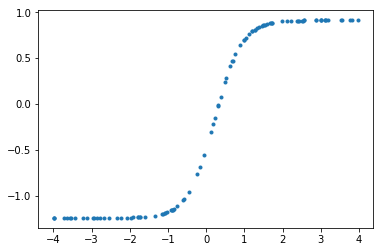

In [5]:
plt.plot(X_train.data.numpy(), y_train.data.numpy(), ".")